In [1]:
#데이터 불러오기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#정상성 확인
import statsmodels.api as sm

#인과관계 통계검정
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
data = pd.read_csv("Z:/team/dataset/제공데이터_merge+기온,강수량,cpi,gdp,천연가스수입.csv",parse_dates=True)

#eda 할 변수들만 추출
data_x = data[['도시가스(톤)_민수용','도시가스(톤)_산업용','민수용비중','산업용비중','RP(상대가격)','GAS_PRICE(산업용도시가스)','OIL_PRICE(원유정제처리제품)','QVA(제조업부가가치/단위:십억원)','평균기온','최저기온','최고기온','강수량','소비자 물가지수(cpi)','국내총생산(시장가격, GDP)','천연가스 수입 중량 합계']]

In [3]:
data_x

,도시가스(톤)_민수용,도시가스(톤)_산업용,민수용비중,산업용비중,RP(상대가격),GAS_PRICE(산업용도시가스),OIL_PRICE(원유정제처리제품),QVA(제조업부가가치/단위:십억원),평균기온,최저기온,최고기온,강수량,소비자 물가지수(cpi),"국내총생산(시장가격, GDP)",천연가스 수입 중량 합계
0,605519.0,83809.0,0.87842,0.12158,0.97,26.94,27.86,36550.3,-1.3,-6.3,4.5,29.5,53.289,118011.1,969744
1,566323.0,70427.0,0.88940,0.11060,0.93,26.94,29.04,36550.3,-1.1,-6.4,5.2,11.4,53.499,118011.1,859127
2,477514.0,62652.0,0.88401,0.11599,0.96,26.94,27.99,36550.3,4.4,-0.7,10.0,121.2,53.862,118011.1,967455
3,337794.0,47050.0,0.87774,0.12226,0.94,26.94,28.74,37152.4,9.9,3.5,16.3,56.9,54.226,121036.1,800687
4,184522.0,30709.0,0.85732,0.14268,0.92,26.94,29.18,37152.4,16.8,10.6,23.5,42.2,54.538,121036.1,738303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,398661.0,457970.0,0.46538,0.53462,0.86,72.93,84.71,121747.5,26.4,23.5,30.5,420.8,100.190,489772.8,1956398
296,380235.0,525619.0,0.41975,0.58025,0.80,65.24,81.26,121747.5,20.1,16.3,24.9,219.1,100.740,489772.8,2934537
297,616682.0,600890.0,0.50649,0.49352,0.76,59.16,78.13,124740.4,13.7,8.3,20.0,10.5,100.180,494927.7,3848453
298,1093747.0,665901.0,0.62157,0.37843,0.75,58.72,78.64,124740.4,8.5,3.4,14.2,40.8,100.090,494927.7,3582119


In [4]:
#한 그래프에 표현하기 위해 정규화 실행
scaler = MinMaxScaler()
scaler.fit(data_x)
transformed_x = scaler.transform(data_x)
transformed_x_dataframe = pd.DataFrame(transformed_x, columns=data_x.columns.tolist())

In [5]:
#eda 할 변수들
civil_demand = transformed_x_dataframe["도시가스(톤)_민수용"]
ind_demand = transformed_x_dataframe["도시가스(톤)_산업용"]
civil_percent = transformed_x_dataframe["민수용비중"]
ind_percent = transformed_x_dataframe["산업용비중"]
RP = transformed_x_dataframe["RP(상대가격)"]
gas_price = transformed_x_dataframe["GAS_PRICE(산업용도시가스)"]
oil_price = transformed_x_dataframe["OIL_PRICE(원유정제처리제품)"]
qva = transformed_x_dataframe["QVA(제조업부가가치/단위:십억원)"]
rain = transformed_x_dataframe["강수량"]
temperature = transformed_x_dataframe["평균기온"]
cpi = transformed_x_dataframe["소비자 물가지수(cpi)"]
gdp = transformed_x_dataframe["국내총생산(시장가격, GDP)"]
lpg_income_weight = transformed_x_dataframe["천연가스 수입 중량 합계"]

# 민수용 수요 - 산업용 수요

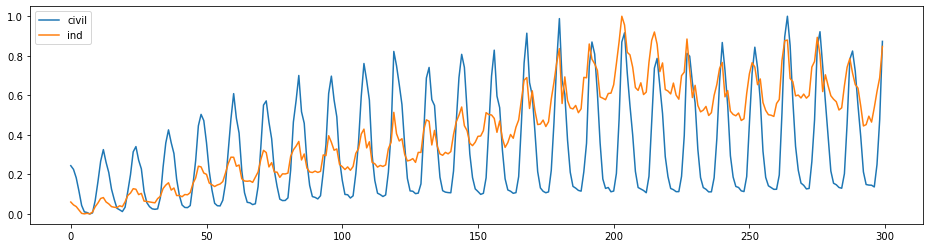

In [6]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(ind_demand, label='ind')
plt.legend(loc=2)

In [7]:
def show_scatter(a,b):
    plt.figure()
    f,ax=plt.subplots(1,3,figsize=(16,4))
    ax[0].scatter(a,b)
    ax[1].scatter(a.diff(1),b.diff(1))
    ax[2].scatter(a.diff(1).shift(1),b.diff(1))
    plt.show()

<Figure size 432x288 with 0 Axes>

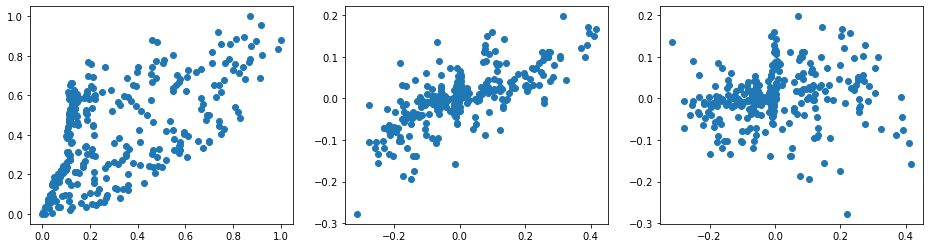

In [8]:
show_scatter(civil_demand,ind_demand)

# 민수용 그래프

### 민수용 수요 - RP(상대가격)

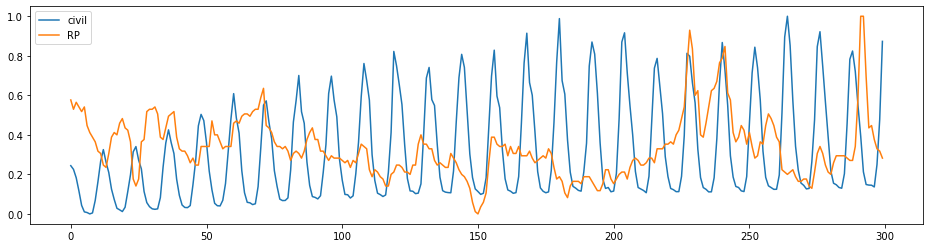

In [9]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(RP,label='RP')
plt.legend(loc=2)

<Figure size 432x288 with 0 Axes>

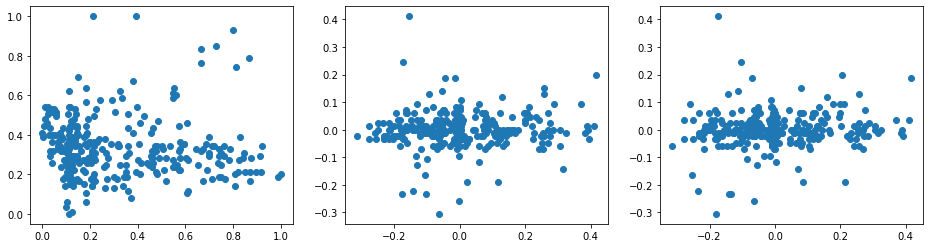

In [10]:
show_scatter(civil_demand,RP)

### 민수용 수요 - GAS_PRICE(산업용도시가스) -> 산업용이라 민수용이랑 관련 낮음

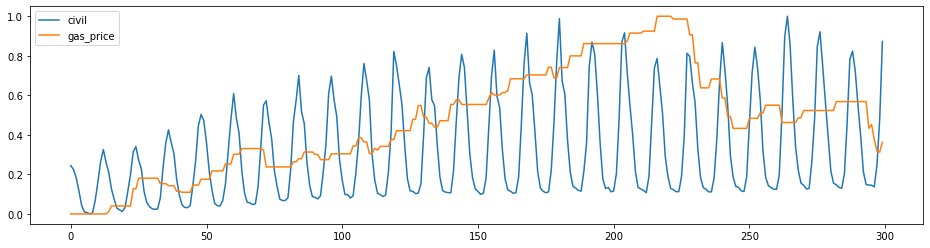

In [11]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(gas_price,label='gas_price')
plt.legend(loc=2)

<Figure size 432x288 with 0 Axes>

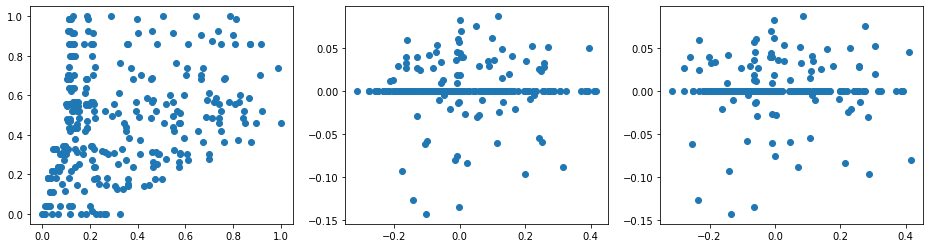

In [12]:
show_scatter(civil_demand,gas_price)

### 민수용 수요 - OIL_PRICE(원유정제처리제품)

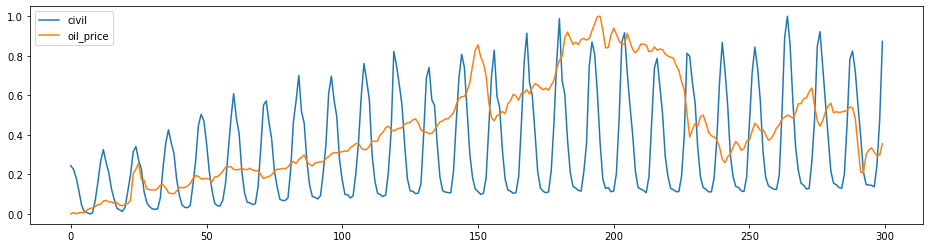

In [13]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(oil_price,label='oil_price')
plt.legend(loc=2)

<Figure size 432x288 with 0 Axes>

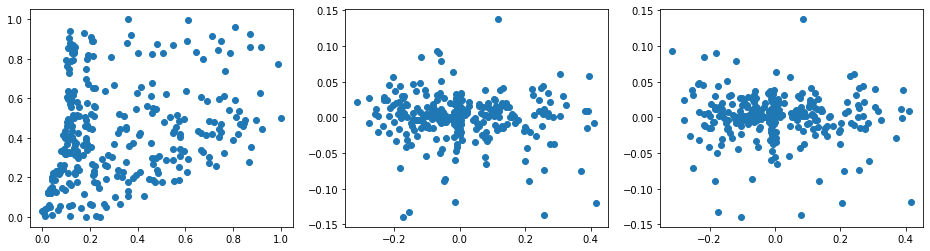

In [14]:
show_scatter(civil_demand,oil_price)

### 민수용 수요 - qva((제조업부가가치/단위:십억원))

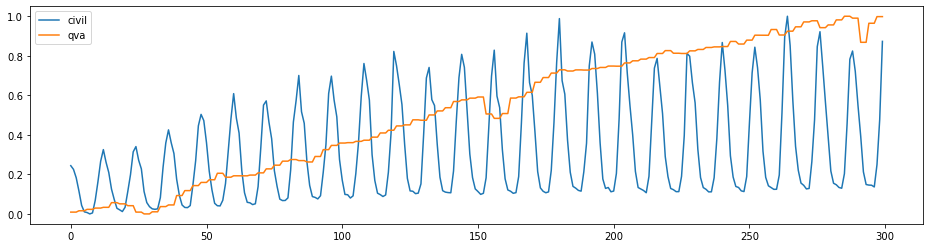

In [15]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(qva,label='qva')
plt.legend(loc=2)

<Figure size 432x288 with 0 Axes>

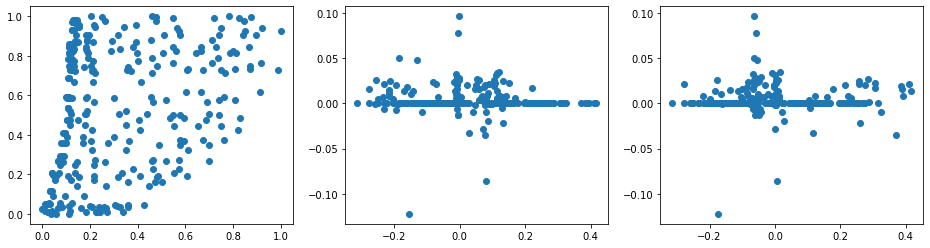

In [16]:
show_scatter(civil_demand,qva)

### 민수용 수요 - 강수량

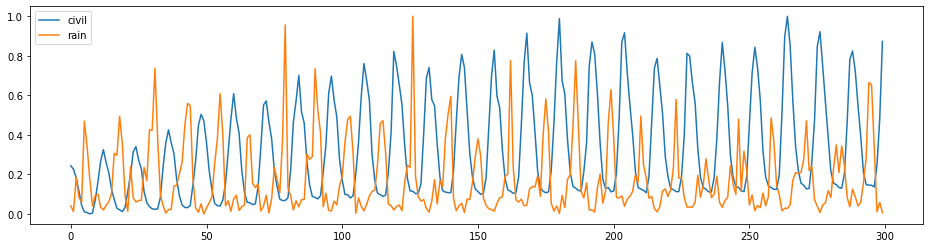

In [17]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(rain,label='rain')
plt.legend(loc=2)

### 민수용 수요 - 평균기온

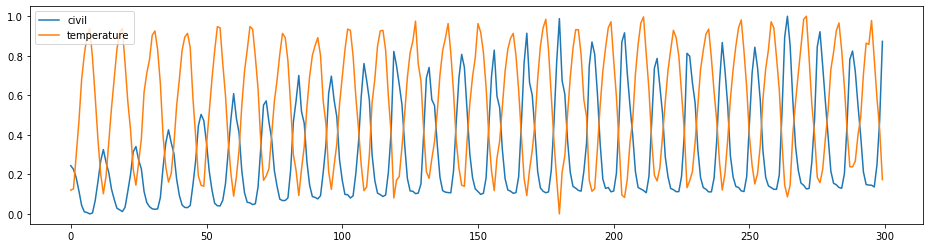

In [18]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(temperature,label='temperature')
plt.legend(loc=2)

<Figure size 432x288 with 0 Axes>

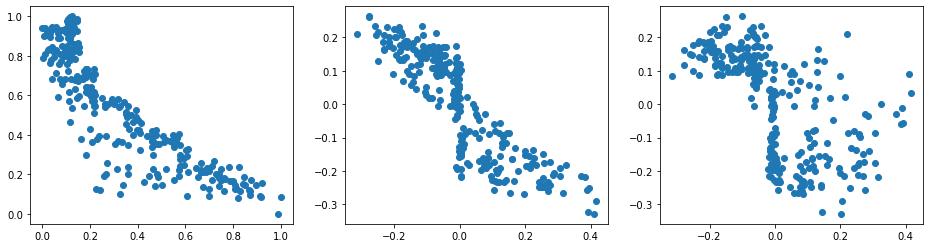

In [19]:
show_scatter(civil_demand,temperature)

### 민수용 수요 - 소비자 물가지수(cpi)

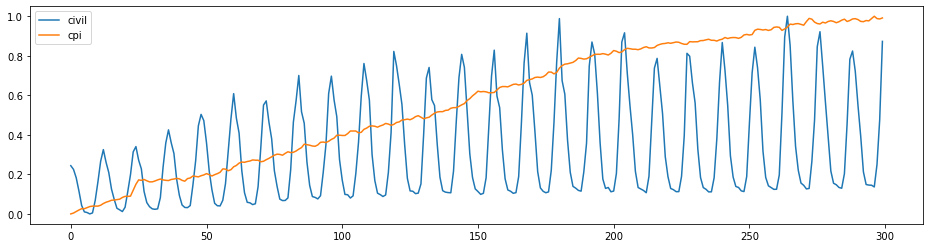

In [20]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(cpi,label='cpi')
plt.legend(loc=2)

<Figure size 432x288 with 0 Axes>

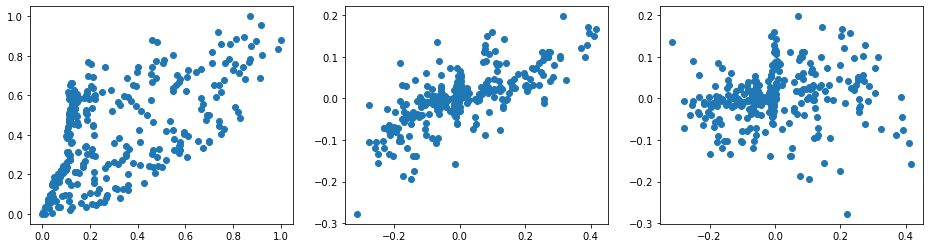

In [21]:
show_scatter(civil_demand,ind_demand)

### 민수용 수요 - 국내총생산(시장가격, GDP)

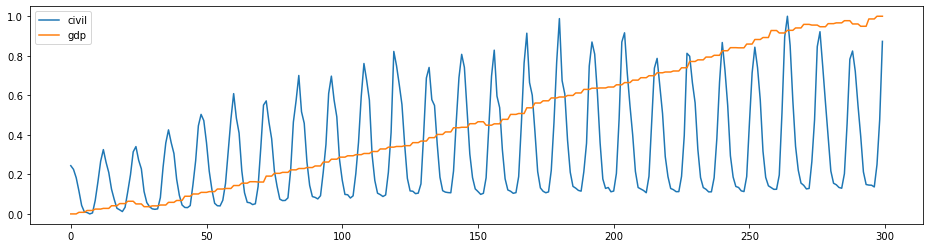

In [22]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(gdp,label='gdp')
plt.legend(loc=2)

### 민수용 수요 - 천연가스 수입 중량

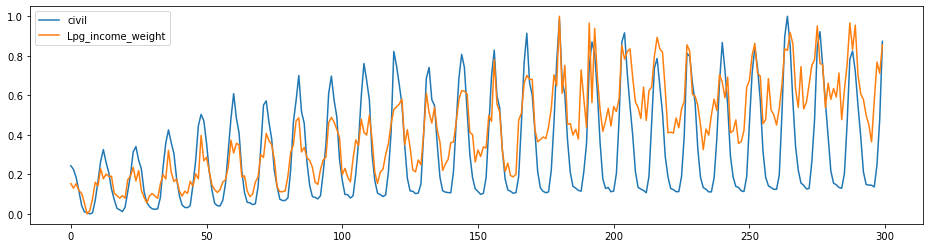

In [23]:
plt.figure(figsize=(16,4))
plt.plot(civil_demand,label='civil')
plt.plot(lpg_income_weight,label='Lpg_income_weight')
plt.legend(loc=2)

# 산업용

### 산업용 수요 - RP(상대가격)

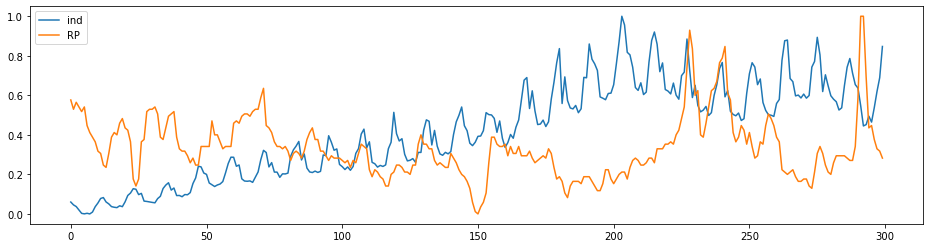

In [24]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(RP,label='RP')
plt.legend(loc=2)

### 산업용 수요 -  GAS_PRICE(산업용도시가스)

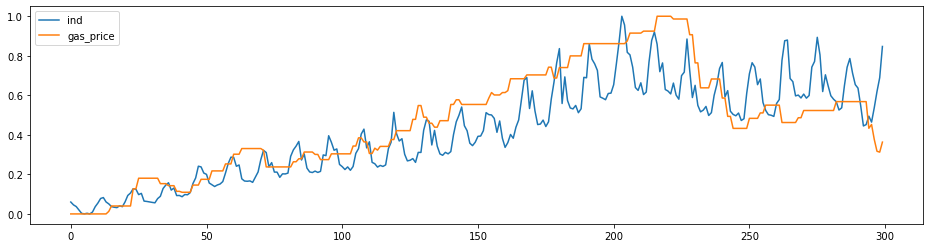

In [25]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(gas_price,label='gas_price')
plt.legend(loc=2)

### 산업용 수요 - OIL_PRICE(원유정제처리제품)

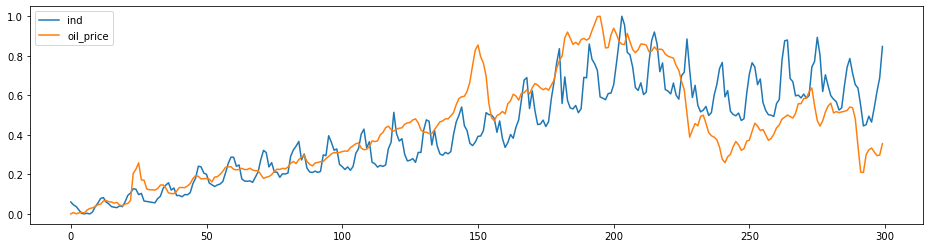

In [26]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(oil_price,label='oil_price')
plt.legend(loc=2)

### 산업용 수요 - qva((제조업부가가치/단위:십억원))

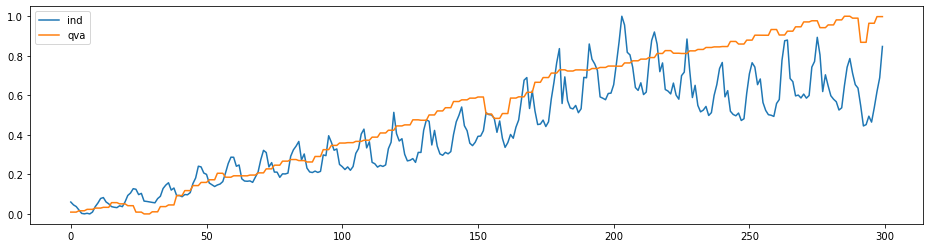

In [27]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(qva,label='qva')
plt.legend(loc=2)

### 산업용 수요 - 강수량

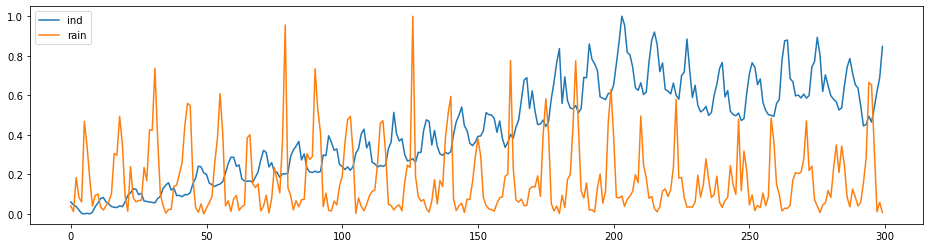

In [28]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(rain,label='rain')
plt.legend(loc=2)

### 산업용 수요 - 평균기온

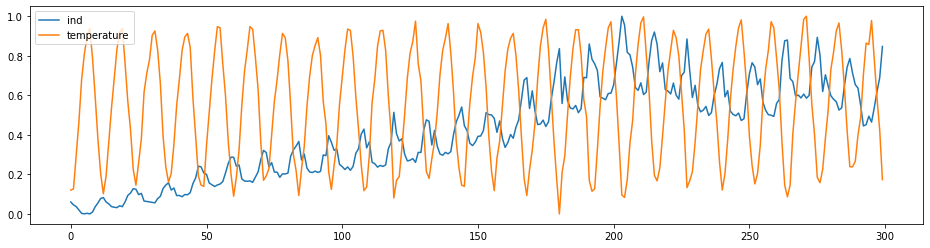

In [29]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(temperature,label='temperature')
plt.legend(loc=2)

### 산업용 수요 - cpi(소비자 물가지수)

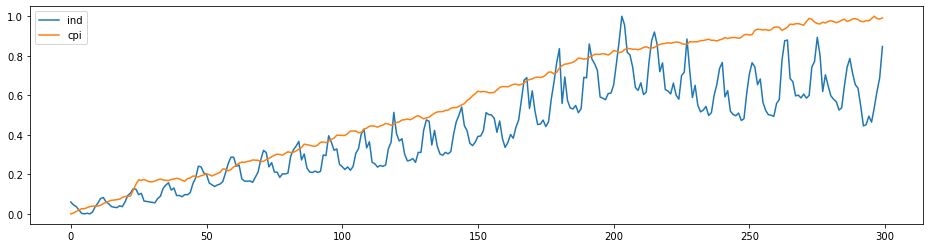

In [30]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(cpi,label='cpi')
plt.legend(loc=2)

### 산업용 수요 - 국내총생산(시장가격, GDP)

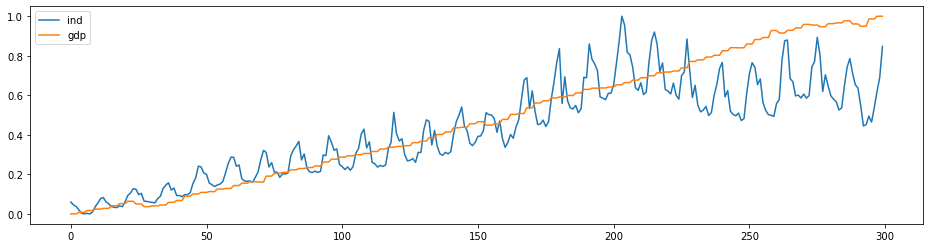

In [31]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(gdp,label='gdp')
plt.legend(loc=2)

### 산업용 수요 - 천연가스 수입 중량

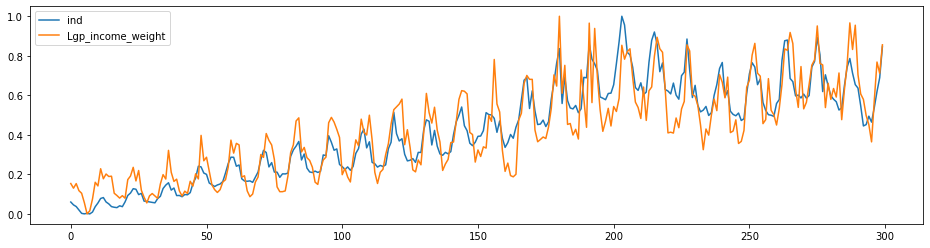

In [32]:
plt.figure(figsize=(16,4))
plt.plot(ind_demand,label='ind')
plt.plot(lpg_income_weight,label='Lgp_income_weight')
plt.legend(loc=2)

# 그레인저 

그래프의 관계를 보고 유의미한 관계가 있는것으로 추정되는 변수와 그레인저 인과관계 분석

In [33]:
#adf로 비정상성 여부 판단하기

target = data_x['도시가스(톤)_민수용'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y1_integ_order = 0
if integ_result[1] >0.1:
    y1_integ_order = y1_integ_order +1

target = data_x['평균기온'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y2_integ_order = 0
if integ_result[1] >0.1:
    y2_integ_order = y2_integ_order +1
    
target = data_x['천연가스 수입 중량 합계'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y3_integ_order = 0
if integ_result[1] >0.1:
    y3_integ_order = y3_integ_order +1
    
    
target = data_x['강수량'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y4_integ_order = 0
if integ_result[1] >0.1:
    y4_integ_order = y4_integ_order +1
    
print("정상성 확인. 1 이상이면 차분이 필요")
print("민수용 수요 : ", y1_integ_order, "\n평균기온 : ", y2_integ_order,"\n천연가스 : ", y3_integ_order ,
      "\n강수량 : ", y4_integ_order)
    

정상성 확인. 1 이상이면 차분이 필요
민수용 수요 :  1 
평균기온 :  0 
천연가스 :  1 
강수량 :  0


In [34]:
#차분 수행
data_x['도시가스(톤)_민수용_차분'] = data_x['도시가스(톤)_민수용'].diff().fillna(data_x['도시가스(톤)_민수용'].iloc[0])
data_x['천연가스 수입 중량 합계_차분'] = data_x['천연가스 수입 중량 합계'].diff().fillna(data_x['천연가스 수입 중량 합계'].iloc[0])

C:\Users\kogas\AppData\Local\Temp\3\ipykernel_180\2475184613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['도시가스(톤)_민수용_차분'] = data_x['도시가스(톤)_민수용'].diff().fillna(data_x['도시가스(톤)_민수용'].iloc[0])
C:\Users\kogas\AppData\Local\Temp\3\ipykernel_180\2475184613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['천연가스 수입 중량 합계_차분'] = data_x['천연가스 수입 중량 합계'].diff().fillna(data_x['천연가스 수입 중량 합계'].iloc[0])


In [35]:
#평균기온<-> 민수용 수요
grangercausalitytests(data_x[['평균기온','도시가스(톤)_민수용_차분']], maxlag=[12],verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=3.0761  , p=0.0004  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=40.4220 , p=0.0001  , df=12
likelihood ratio test: chi2=37.8256 , p=0.0002  , df=12
parameter F test:         F=3.0761  , p=0.0004  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (3.076092693289416, 0.0004369660811452282, 263.0, 12),
   'ssr_chi2test': (40.421963300411484, 6.118432395443367e-05, 12),
   'lrtest': (37.8255671790007, 0.0001639745564919156, 12),
   'params_ftest': (3.07609269331924, 0.0004369660810939218, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 

In [36]:
#천연가스 수입 중량 합계 <-> 민수용 수요
grangercausalitytests(data_x[['천연가스 수입 중량 합계_차분','도시가스(톤)_민수용_차분']], maxlag=[12], verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=5.0546  , p=0.0000  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=66.4214 , p=0.0000  , df=12
likelihood ratio test: chi2=59.7675 , p=0.0000  , df=12
parameter F test:         F=5.0546  , p=0.0000  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (5.054638926896154, 1.4156800309200241e-07, 263.0, 12),
   'ssr_chi2test': (66.4214149481107, 1.487053508324293e-09, 12),
   'lrtest': (59.76753485622521, 2.4886167687374637e-08, 12),
   'params_ftest': (5.054638926951516, 1.4156800305981302e-07, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0

In [37]:
#강수량 <-> 민수용 수요
grangercausalitytests(data_x[['강수량', '도시가스(톤)_민수용_차분']], maxlag=[12], verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=5.0467  , p=0.0000  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=66.3166 , p=0.0000  , df=12
likelihood ratio test: chi2=59.6824 , p=0.0000  , df=12
parameter F test:         F=5.0467  , p=0.0000  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (5.046664281581405, 1.462816679679545e-07, 263.0, 12),
   'ssr_chi2test': (66.31662265074273, 1.5551275317749976e-09, 12),
   'lrtest': (59.682368884425614, 2.5791062241507515e-08, 12),
   'params_ftest': (5.046664281578621, 1.4628166796962754e-07, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0.,

In [38]:
#adf로 비정상성 여부 판단하기
target = data_x['도시가스(톤)_산업용'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], index=['test statistics', 'p-value', 'used lag', 'used observations'])

y1_integ_order = 0
if integ_result[1] >0.1:
    y1_integ_order = y1_integ_order +1

target = data_x['천연가스 수입 중량 합계'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], index=['test statistics', 'p-value', 'used lag', 'used observations'])

y2_integ_order = 0
if integ_result[1] >0.1:
    y2_integ_order = y2_integ_order +1
    
target = data_x['소비자 물가지수(cpi)'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y3_integ_order = 0
if integ_result[1] >0.1:
    y3_integ_order = y3_integ_order +1
    
    
target = data_x['QVA(제조업부가가치/단위:십억원)'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y4_integ_order = 0
if integ_result[1] >0.1:
    y4_integ_order = y4_integ_order +1
    
target = data_x['GAS_PRICE(산업용도시가스)'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y5_integ_order = 0
if integ_result[1] >0.1:
    y5_integ_order = y5_integ_order +1
    
target = data_x['OIL_PRICE(원유정제처리제품)'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y6_integ_order = 0
if integ_result[1] >0.1:
    y6_integ_order = y6_integ_order +1
    
target = data_x['평균기온'].copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['test statistics', 'p-value', 'used lag', 'used observations'])

y7_integ_order = 0
if integ_result[1] >0.1:
    y7_integ_order = y7_integ_order +1
    
print("정상성 확인. 1 이상이면 차분이 필요")
print("산업용 수요 : ", y1_integ_order, "\n천연가스 수입 중량 합계 : ", y2_integ_order,
      "\n소비자 물가지수(cpi) : ", y3_integ_order ,"\nQVA(제조업부가가치/단위:십억원) : ", y4_integ_order,
      "\nGAS_PRICE(산업용도시가스) : ", y5_integ_order,"\nOIL_PRICE(원유정제처리제품) : ", y6_integ_order ,
      "\n평균기온 : ", y7_integ_order)
    

정상성 확인. 1 이상이면 차분이 필요
산업용 수요 :  1 
천연가스 수입 중량 합계 :  1 
소비자 물가지수(cpi) :  1 
QVA(제조업부가가치/단위:십억원) :  1 
GAS_PRICE(산업용도시가스) :  1 
OIL_PRICE(원유정제처리제품) :  1 
평균기온 :  0


In [39]:
#차분 수행
data_x['도시가스(톤)_산업용_차분'] = data_x['도시가스(톤)_산업용'].diff().fillna(data_x['도시가스(톤)_산업용'].iloc[0])
#data_x['천연가스 수입 중량 합계_차분'] = data_x['천연가스 수입 중량 합계'].diff().fillna(data_x['천연가스 수입 중량 합계'].iloc[0])
data_x['소비자 물가지수(cpi)_차분'] = data_x['소비자 물가지수(cpi)'].diff().fillna(data_x['소비자 물가지수(cpi)'].iloc[0])
data_x['QVA(제조업부가가치/단위:십억원)_차분'] = data_x['QVA(제조업부가가치/단위:십억원)'].diff().fillna(data_x['QVA(제조업부가가치/단위:십억원)'].iloc[0])
data_x['GAS_PRICE(산업용도시가스)_차분'] = data_x['GAS_PRICE(산업용도시가스)'].diff().fillna(data_x['GAS_PRICE(산업용도시가스)'].iloc[0])
data_x['OIL_PRICE(원유정제처리제품)_차분'] = data_x['OIL_PRICE(원유정제처리제품)'].diff().fillna(data_x['OIL_PRICE(원유정제처리제품)'].iloc[0])

C:\Users\kogas\AppData\Local\Temp\3\ipykernel_180\1186267874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['도시가스(톤)_산업용_차분'] = data_x['도시가스(톤)_산업용'].diff().fillna(data_x['도시가스(톤)_산업용'].iloc[0])
C:\Users\kogas\AppData\Local\Temp\3\ipykernel_180\1186267874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['소비자 물가지수(cpi)_차분'] = data_x['소비자 물가지수(cpi)'].diff().fillna(data_x['소비자 물가지수(cpi)'].iloc[0])


In [40]:
#천연가스 수입 중량 합계 <-> 산업용 수요
grangercausalitytests(data_x[['천연가스 수입 중량 합계_차분','도시가스(톤)_산업용_차분']], maxlag=[12], verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=5.5549  , p=0.0000  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=72.9948 , p=0.0000  , df=12
likelihood ratio test: chi2=65.0601 , p=0.0000  , df=12
parameter F test:         F=5.5549  , p=0.0000  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (5.554869391697662, 1.8175880411973143e-08, 263.0, 12),
   'ssr_chi2test': (72.99478561865826, 8.779286996063549e-11, 12),
   'lrtest': (65.060073741015, 2.6574391832005855e-09, 12),
   'params_ftest': (5.554869391665595, 1.8175880414361316e-08, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0.

In [41]:
#소비자 물가지수(cpi) <-> 산업용 수요
grangercausalitytests(data_x[['소비자 물가지수(cpi)_차분','도시가스(톤)_산업용_차분']], maxlag=[12], verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=4.1195  , p=0.0000  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=54.1324 , p=0.0000  , df=12
likelihood ratio test: chi2=49.6044 , p=0.0000  , df=12
parameter F test:         F=4.1195  , p=0.0000  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (4.119451569580545, 6.554275505325214e-06, 263.0, 12),
   'ssr_chi2test': (54.13241302079986, 2.587806541676978e-07, 12),
   'lrtest': (49.60435811619925, 1.6393396319966238e-06, 12),
   'params_ftest': (4.119451569490981, 6.554275507722252e-06, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0.

In [42]:
#QVA(제조업부가가치/단위:십억원) <-> 산업용 수요
grangercausalitytests(data_x[['QVA(제조업부가가치/단위:십억원)_차분','도시가스(톤)_산업용_차분']], maxlag=[12], verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=2.3232  , p=0.0077  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=30.5289 , p=0.0023  , df=12
likelihood ratio test: chi2=29.0168 , p=0.0039  , df=12
parameter F test:         F=2.3232  , p=0.0077  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (2.3232334538625086, 0.007739268584957834, 263.0, 12),
   'ssr_chi2test': (30.528877629463228, 0.002323230179447778, 12),
   'lrtest': (29.016765608441347, 0.003917469167847496, 12),
   'params_ftest': (2.3232334538627026, 0.00773926858495233, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 

In [43]:
#GAS_PRICE(산업용도시가스) <-> 산업용 수요
grangercausalitytests(data_x[['GAS_PRICE(산업용도시가스)_차분','도시가스(톤)_산업용_차분']], maxlag=[12], verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=2.7305  , p=0.0017  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=35.8807 , p=0.0003  , df=12
likelihood ratio test: chi2=33.8155 , p=0.0007  , df=12
parameter F test:         F=2.7305  , p=0.0017  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (2.730505300208529, 0.0016761287990453065, 263.0, 12),
   'ssr_chi2test': (35.88070843163755, 0.0003386099741631701, 12),
   'lrtest': (33.815457794043596, 0.0007212430820674644, 12),
   'params_ftest': (2.7305053001817527, 0.0016761287992175307, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0

In [44]:
#OIL_PRICE(원유정제처리제품) <-> 산업용 수요
grangercausalitytests(data_x[['OIL_PRICE(원유정제처리제품)_차분','도시가스(톤)_산업용_차분']], maxlag=[12], verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.3012  , p=0.2175  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=17.0988 , p=0.1459  , df=12
likelihood ratio test: chi2=16.6105 , p=0.1648  , df=12
parameter F test:         F=1.3012  , p=0.2175  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (1.3012134551140397, 0.2175250579751433, 263.0, 12),
   'ssr_chi2test': (17.098835364540385, 0.14591712711109295, 12),
   'lrtest': (16.610484773959342, 0.16484622794271522, 12),
   'params_ftest': (1.3012134551195353, 0.21752505797193344, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 0., 

In [45]:
#평균기온 <-> 산업용 수요
grangercausalitytests(data_x[['평균기온','도시가스(톤)_산업용_차분']], maxlag=[12],verbose=True)


Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.8554  , p=0.0401  , df_denom=263, df_num=12
ssr based chi2 test:   chi2=24.3813 , p=0.0180  , df=12
likelihood ratio test: chi2=23.4040 , p=0.0245  , df=12
parameter F test:         F=1.8554  , p=0.0401  , df_denom=263, df_num=12


{12: ({'ssr_ftest': (1.855403192484016, 0.04012951065372968, 263.0, 12),
   'ssr_chi2test': (24.381267806938247, 0.018042873240707663, 12),
   'lrtest': (23.404024461910126, 0.024485282958229, 12),
   'params_ftest': (1.855403192468472, 0.04012951065581684, 263.0, 12.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 0., 0.

# 민수용 수요와 인과적 관계가 있는 변수들
평균기온, 천연가스 수입 중량 합계, 강수량 -> 민수용 수요 

# 산업용 수요에 인과적 관계가 있는 변수들
천연가스 수입 중량 합계, 소비자 물가지수(cpi), QVA(제조업부가가치/단위:십억원),GAS_PRICE(산업용도시가스), 평균기온 -> 산업용 수요

아리마 모델에 사용하기 위해서는 예측된 미래 변수값이 필요 --> 예측이 잘 될것으로 추정되는 변수 : 평균기온
### 따라서 수요를 예측할 외래변수로 평균기온을 선택

In [58]:
data[['도시가스(톤)_민수용','도시가스(톤)_산업용','평균기온']]

,도시가스(톤)_민수용,도시가스(톤)_산업용,평균기온
Unnamed: 0,,,
1996-01-01,605519.0,83809.0,-1.3
1996-02-01,566323.0,70427.0,-1.1
1996-03-01,477514.0,62652.0,4.4
1996-04-01,337794.0,47050.0,9.9
1996-05-01,184522.0,30709.0,16.8
...,...,...,...
2020-08-01,398661.0,457970.0,26.4
2020-09-01,380235.0,525619.0,20.1
2020-10-01,616682.0,600890.0,13.7


In [59]:
data[['도시가스(톤)_민수용','도시가스(톤)_산업용','평균기온']].to_csv("Z:/team/dataset/제공데이터_merge+평균기온.csv")